In [1]:
# Settings
_path_to_settings_files = "C:\\Users\\Stephen\\OneDrive\\Documents\\NCI\\Thesis\\Data"

# in_degree or degree
_in_degree = True

# Window size to use for graph-of-words extraction
_windowSize = 3

# If the degree is > windowSize-1 then add the term and edge
# We use windowSize for in_degree counts, and windowSize*2 for degree counts
_degree_compare = (_windowSize-1)*2
if _in_degree == True:
    _degree_compare = _windowSize-1

# Limits for connected term removal
_upper_percentile = 99.7
_lower_count = 2




In [4]:
# Import required libraries

# Regex
import re

#import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

# NetworkX graph library
import networkx as nx

# Random library
import random

# File libraries
import os
import glob
from pathlib import Path

# Time Library
from time import time

# Maths library
import math

# Scipy stats functions
import scipy.stats
import numpy as np

# KD Tree algo
from sklearn.neighbors import KDTree

# kmeans cluster algorithm 
from sklearn.cluster import KMeans

# Confusion matrix, precision, recall, F1
from sklearn.metrics import *

# Pandas library
import pandas as pd

# Operator
import operator

print("Done")

Done


In [5]:
# Get list of Google stopwords from file

fname = _path_to_settings_files + "\\GoogleStopwords.txt"

with open(fname) as f:
    StopWords = f.readlines()
# remove whitespace characters like `\n` at the end of each line
StopWords = [x.strip() for x in StopWords]
# Stem the stopwords
StopWords = list(set([stemmer.stem(y) for y in StopWords]))



In [6]:
# Create list of stop words to use- first the NLTK stopwords
cachedStopWords = stopwords.words("english")
# Add in the Google Stopwords
cachedStopWords += StopWords
#print(cachedStopWords)

In [7]:
# VB style text parsing functions
def left(s, amount):
    return s[:amount]

def right(s, amount):
    return s[-amount:]

def mid(s, offset, amount):
    return s[offset:offset+amount]


In [8]:
# This function cleans a piece of text of non letter/space characters
p1 = re.compile(r'[^a-z ]', re.UNICODE)
p2 = re.compile(r' +', re.UNICODE)

def CleanWord(w):
    x = w.lower()
    #x = re.sub(r'[^a-z ]','',x)
    x = p1.sub(' ', x) #.strip() 
    x = p2.sub(' ', x).strip()
    #x = x.split(' ')
    return x

print(CleanWord("the quick Quick \r\nbrown.\r\nfox 1.2)"))

the quick quick brown fox


In [9]:
import csv

def StoreGraphToFile(Graph, PassNum, Stage, Desc):
    passNo = right('00' + str(PassNum), 2)
    filename = _path_to_output + '\\Pass' + passNo + '.' + str(Stage) + ' ' + Desc + '.csv'
    myfile = open(filename, 'w')
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)

    for n,d in Graph.nodes_iter(data=True):
        mylist=str(n) + "\t" + str(d["type"]) + "\t" + str(d["x"]) + "\t" + str(d["y"]) + "\n"
        myfile.write(mylist)

    myfile.close()

In [111]:


# Function to parse out words and bigrams
def FileToGraph(fileTuple):
    # Array to return from function
    rArr = []

    # Take the filename from the tuple
    filename = fileTuple[0]
    
    # remove non letters from the text in the tuple
    r = CleanWord(fileTuple[1])
    
    # split into an array, stem, and remove words in the stopword list
    arr = [stemmer.stem(y) for y in r.split(" ")]
    arr = [word for word in arr if word not in cachedStopWords]
    
    # Create a new directed graph
    G = nx.DiGraph()
    
    arrLen = len(arr)

    # Add the first few nodes
    for i in range(0, _windowSize-1):
        G.add_node(arr[i])

    for i in range(_windowSize-1, arrLen):
        G.add_node(arr[i])
        for j in range(0, (_windowSize-1)):
            src = arr[i-(_windowSize-1)]
            tgt = arr[i-j]
            if G.has_edge(src, tgt):
                # we added this one before, just increase the weight by one
                G[src][tgt]['weight'] += 1
            else:
                # new edge. add with weight=1
                G.add_edge(src, tgt, weight=1)

    for i in range(arrLen-(_windowSize-1), arrLen):
        for j in range(1, (arrLen-i)):
            src = arr[i]
            tgt = arr[i+j]
            if G.has_edge(src, tgt):
                # we added this one before, just increase the weight by one
                G[src][tgt]['weight'] += 1
            else:
                # new edge. add with weight=1
                G.add_edge(src, tgt, weight=1)
        
    # Get the "indegree" or "degree" of the terms
    if _in_degree == True:
        d = G.in_degree()
    else:
        d = G.degree()
    

    # Now add all the words the the return array with the filename and the count
    for term in d:
        rArr.append(filename + "\t" + term + "\t" + str(d[term]))
        
    # Return the array of graphs and the array of words
    return rArr, G, arr
    #return G



In [112]:

#text = input()

text = 'in natural language processing (NLP) a text graph is a graph representation of a text item '
text += '(document, passage or sentence) it is typically created as a preprocessing step to support '
text += 'NLP tasks such as text condensation term disambiguation (topic based) text summarization '
text += '(summarize large text collections) and relation extraction (extract relations from unstructured text) '
text += 'The semantics of what a text graph''s nodes and edges represent can vary widely. Nodes for example can '
text += 'simply connect to tokenized words, or to domain-specific terms, or to entities mentioned in the text. '
text += 'The edges, on the other hand, can be between these text-based tokens or they can also link to a knowledge base. '
d = ['filename1', text]

ftg, Gr, arr = FileToGraph(d)
arr

['natur',
 'languag',
 'process',
 'nlp',
 'text',
 'graph',
 'graph',
 'represent',
 'text',
 'item',
 'document',
 'passag',
 'sentenc',
 'typic',
 'creat',
 'preprocess',
 'step',
 'support',
 'nlp',
 'task',
 'text',
 'condens',
 'term',
 'disambigu',
 'topic',
 'base',
 'text',
 'summar',
 'summar',
 'larg',
 'text',
 'collect',
 'relat',
 'extract',
 'extract',
 'relat',
 'unstructur',
 'text',
 'semant',
 'text',
 'graph',
 'node',
 'edg',
 'repres',
 'vari',
 'wide',
 'node',
 'simpli',
 'connect',
 'token',
 'word',
 'domain',
 'specif',
 'term',
 'entiti',
 'mention',
 'text',
 'edg',
 'hand',
 'text',
 'base',
 'token',
 'link',
 'knowledg',
 'base']

In [108]:
nodes = []
sizes = []
lbls = {}

for f in ftg:
    a = f.split("\t")
    nodes.append(a[1])
    sizes.append(int(a[2])*200)
    if int(a[2])>3:
        lbls[a[1]]=a[1]
    else:
        lbls[a[1]]=""
#print(str(sizes))

In [118]:
%matplotlib inline
import matplotlib
#print(matplotlib.rcParams['figure.figsize'])
matplotlib.rcParams['figure.figsize']=[10.0,10.0]

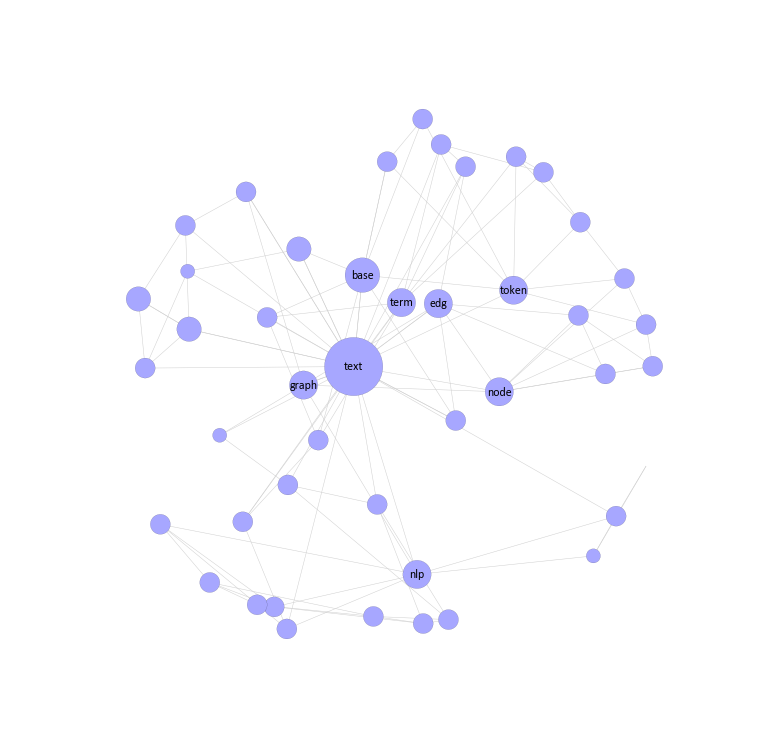

In [121]:
#nx.draw(Gr)
#nx.draw_networkx_labels(Gr,pos=nx.spring_layout(Gr))
#nx.draw_networkx(Gr,arrows=False,with_labels=True,node_color='#a7a7ff',Ax=Axs,nodelist=nodes,node_size=sizes)

nx.draw(Gr,arrows=False,with_labels=True,node_color='#a7a7ff',nodelist=nodes,node_size=sizes,alpha=1,linewidths=0.1,width=0.5, 
       edge_color="#d0d0d0", labels=lbls, font_family="Calibri")

[8.0, 8.0]
